In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# using magic function of matplotlib which dispaly the output just below the code and does not open another windows or tab
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
train = shuffle(pd.read_csv('train.csv'))
test = shuffle(pd.read_csv('test.csv'))
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
3021,0.203917,0.006350,-0.098109,0.168932,-0.167463,-0.033393,0.173282,-0.193351,-0.126930,0.350040,...,-0.504042,0.697864,0.851408,-0.956754,0.002252,-0.695203,0.221053,0.194618,16,WALKING_DOWNSTAIRS
6345,0.294532,-0.002639,-0.124910,-0.958266,-0.919886,-0.888666,-0.960221,-0.918187,-0.894879,-0.890625,...,-0.377679,-0.086785,-0.368762,-0.394381,-0.039073,0.713713,0.390839,0.842815,28,LAYING
3407,0.327495,-0.057756,-0.178172,0.071035,0.013070,-0.061259,0.015235,-0.120996,-0.034121,0.361759,...,-0.939152,-0.453172,0.807221,-0.951796,0.603144,-0.562555,0.208314,0.308899,17,WALKING_UPSTAIRS
3751,0.268231,-0.004146,-0.094503,0.473123,0.452403,-0.152600,0.450082,0.482764,-0.239383,0.539911,...,-0.558550,0.278372,0.363240,0.885432,0.848414,-0.779760,0.249384,0.035484,19,WALKING_DOWNSTAIRS
4463,0.281496,-0.015050,-0.113915,-0.995964,-0.995171,-0.992375,-0.996648,-0.994879,-0.993697,-0.941203,...,-0.780901,0.109600,-0.201831,-0.337824,0.275055,0.467348,-0.470237,-0.527071,22,LAYING


In [3]:
train.shape

(7352, 563)

In [4]:
test.shape

(2947, 563)

In [5]:
# Checking for missing values
print('Any missing value in training set:', train.isnull().values.any())
print('Any missing value in training set:', test.isnull().values.any())

Any missing value in training set: False
Any missing value in training set: False


In [6]:
# Exploring the data
train_outcome = pd.crosstab(index = train['Activity'], columns='Count')
train_outcome

col_0,Count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


In [7]:
#counting the values under activity column
temp = train['Activity'].value_counts()
temp

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [8]:
df = pd.DataFrame({'labels':temp.index, 'values':temp.values})
df.head(3)

,labels,values
0,LAYING,1407
1,STANDING,1374
2,SITTING,1286


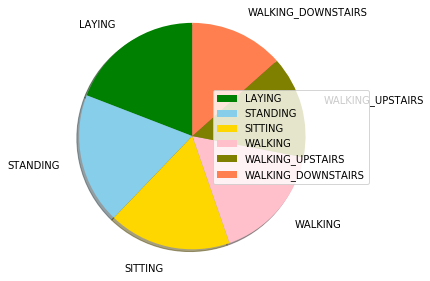

In [9]:
# Visualising the temp variable
labels=df['labels']
sizes = df['values']
colors = ['green', 'skyblue', 'gold', 'pink', 'olive', 'coral']
patches, texts = plt.pie(sizes, colors=colors, labels = labels, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc='right')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Data Processing

In [10]:
# Dropping the unwanted values from the train set
X_train = pd.DataFrame(train.drop(['Activity', 'subject'], axis=1))
Y_train_label = train.Activity.values.astype(object)

# Dropping the unwanted values from the test set
X_test = pd.DataFrame(test.drop(['Activity', 'subject'], axis=1))
Y_test_label = test.Activity.values.astype(object)

In [11]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# Encoding the train dataset
encoder.fit(Y_train_label)
y_train = encoder.transform(Y_train_label)
y_train

array([4, 0, 5, ..., 0, 3, 4])

In [12]:
encoder.fit(Y_test_label)
y_test = encoder.transform(Y_test_label)
y_test

array([2, 4, 2, ..., 1, 1, 0])

In [13]:
# Finding the number of numeric data in our train dataset
num_cols = X_train._get_numeric_data().columns
num_cols.size

561

## Model building

In [14]:
from sklearn.preprocessing import StandardScaler
# Converting our data on same scale
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [15]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [16]:
#Predict the values of x_test
y_pred = knn.predict(x_test)
print((accuracy_score(y_test, y_pred)*100), '%')

89.98982015609094 %


In [17]:
# Test accuracy score with different values
scores = []
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

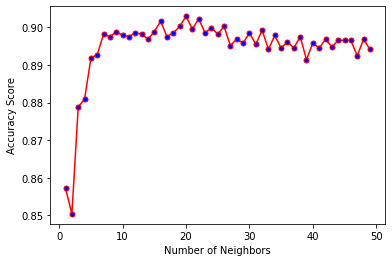

In [18]:
# Plottig the number of neighbours vs accuracy score
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o', 
        markersize=5, markerfacecolor='blue')
plt.show()

In [19]:
scores = np.array(scores)
print('Optimal number of neighbors is:', scores.argmax())
print('Accuracy Score:' +str(scores.max()*100),'%')

Optimal number of neighbors is: 19
Accuracy Score:90.29521547336275 %


## Final observation

In [20]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_label = list(encoder.inverse_transform(y_pred))
y_pred_label

['STANDING',
 'WALKING_DOWNSTAIRS',
 'STANDING',
 'WALKING_UPSTAIRS',
 'SITTING',
 'STANDING',
 'WALKING_DOWNSTAIRS',
 'LAYING',
 'WALKING_UPSTAIRS',
 'WALKING',
 'SITTING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'STANDING',
 'STANDING',
 'WALKING',
 'WALKING',
 'STANDING',
 'STANDING',
 'SITTING',
 'STANDING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_DOWNSTAIRS',
 'STANDING',
 'WALKING_UPSTAIRS',
 'STANDING',
 'WALKING_UPSTAIRS',
 'LAYING',
 'STANDING',
 'WALKING',
 'SITTING',
 'STANDING',
 'WALKING',
 'STANDING',
 'STANDING',
 'WALKING_UPSTAIRS',
 'SITTING',
 'LAYING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS',
 'STANDING',
 'SITTING',
 'WALKING',
 'WALKING_UPSTAIRS',
 'LAYING',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'WALKING_DOWNSTAIRS',
 'WALKING',
 'STANDING',
 'STANDING',
 'WALKING',
 'LAYING',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'WALKING_UPSTAIRS',
 'LAYING',
 'LAYING',
 'WALKING_DOWNSTAIRS',
 'WALKING',
 'SITTING',
 'WALKI

In [21]:
print(confusion_matrix(Y_test_label, y_pred_label))

[[513  13  11   0   0   0]
 [  3 390  97   0   0   1]
 [  0  22 510   0   0   0]
 [  0   0   0 482  12   2]
 [  0   0   0  45 327  48]
 [  0   0   0  39   1 431]]


In [22]:
print(classification_report(Y_test_label, y_pred_label))

                    precision    recall  f1-score   support

            LAYING       0.99      0.96      0.97       537
           SITTING       0.92      0.79      0.85       491
          STANDING       0.83      0.96      0.89       532
           WALKING       0.85      0.97      0.91       496
WALKING_DOWNSTAIRS       0.96      0.78      0.86       420
  WALKING_UPSTAIRS       0.89      0.92      0.90       471

          accuracy                           0.90      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.90      0.90      2947

